# step1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
# Folder path:
path=r'C:\online course\career\python data\202304'

In [3]:
df=pd.read_pickle(os.path.join(path,'02.Data','Prepared data','orders_products_customers_merged.pkl'))

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,Order Interval,product_id,add_to_cart_order,reordered,...,order_freq_flag,First Name,Last Name,Gender,STATE,Age,dependants,fam_status,income,True
0,2968173,15,prior,15,1,9,7.0,196,2,0,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
1,1870022,15,prior,17,2,16,8.0,196,6,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
2,1911383,15,prior,18,2,11,7.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
3,2715276,15,prior,21,1,9,7.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both
4,487368,15,prior,22,1,10,14.0,196,1,1,...,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both


# step2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Create a bar chart for orders day of week

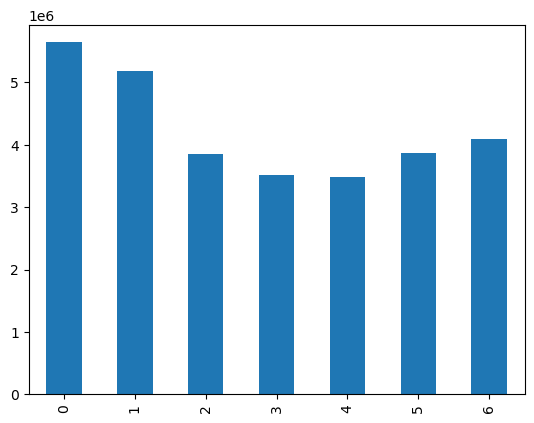

In [5]:
# create a bar chart using value counts function for orders day of week saved under the variable 'bar'
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

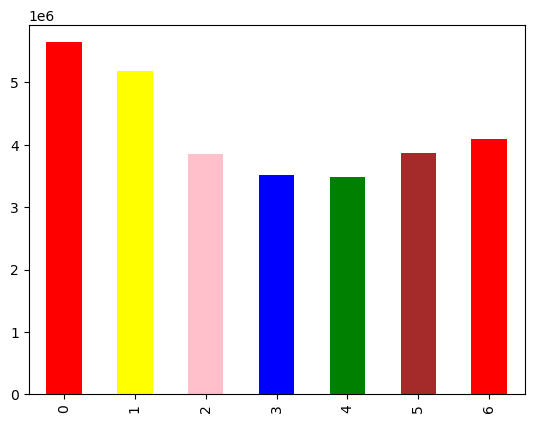

In [6]:
# export the bar chart
bar=df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['red','yellow','pink','blue','green','brown'])

In [7]:
bar.figure.savefig(os.path.join(path,'04.Analysis','bar_orders_dow.png'))

# Create a scatterplot for Prices

the scatterplot allowed us to isolate the outliers in our prices data set, there were many rows with artificially high prices

<Axes: xlabel='prices', ylabel='prices'>

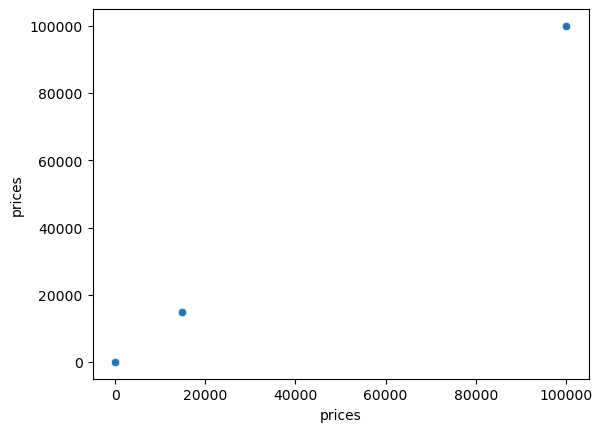

In [8]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [9]:
# prices greater than $100 we don't need
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [10]:
# check
df['prices'].max()

25.0

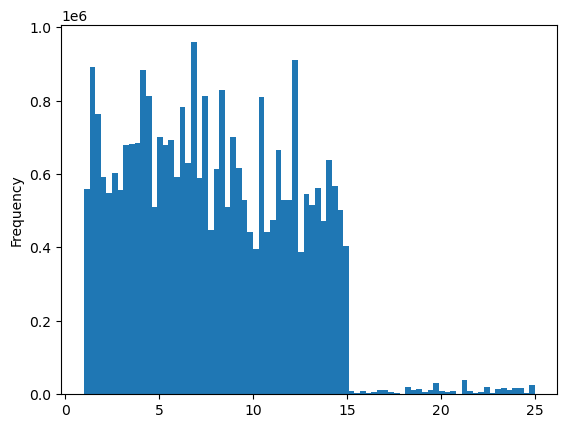

In [11]:
# retry that histogram of  “prices” column:
hist=df['prices'].plot.hist(bins=80)

In [12]:
# export the histogram
hist.figure.savefig(os.path.join(path,'04.Analysis','hist_orders_dow.png'))

# Line chart of prices and days of week

we will create a random representative sample of 70% of the data

In [13]:
# 1.first we assign random numbers between 0-1 to a list then length of the dataframe
# 2.make an array (dev) containing the values less than or equal to 0.7
# 3.we will use seed 4 in the random number generator for consistency(same us excercise)
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# we can then split the data frame 70/30 using the values list in dev (70%) , and not in dev (30%)
big = df[dev]

In [15]:
# 30 percent in the smaller dataframe
small=df[~dev]

In [16]:
# check that the number of rows match the data frame length
len(df)

29632737

In [17]:
#divide the database futher into only the columns we need to make the line chart
df_2 = small[['orders_day_of_week','prices']]

 # finally ready to create line chart.

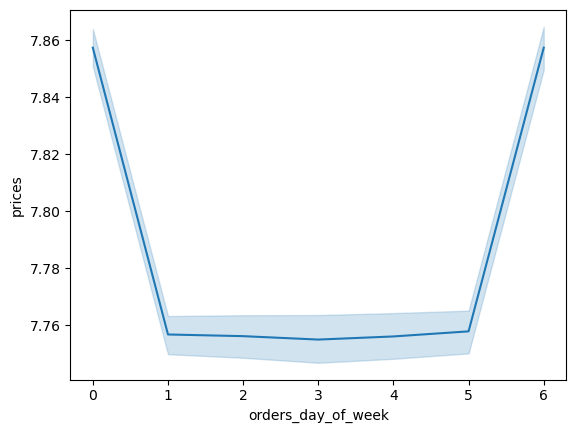

In [18]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [19]:
# export the line chart
line.figure.savefig(os.path.join(path,'04.Analysis','line_orders_dow.png'))

# Step3 

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.In a markdown cell beneath your histogram, describe what the histogram demonstrates.

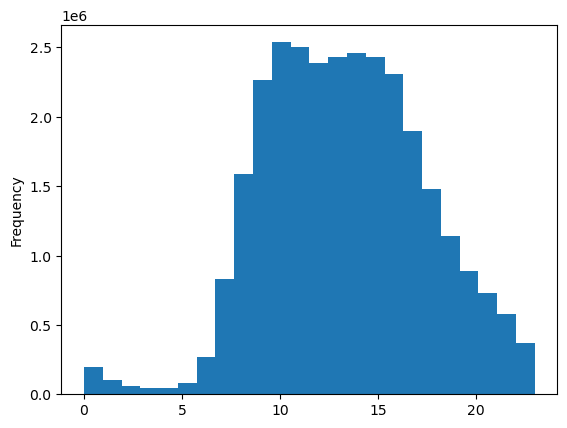

In [20]:
# making a histogram for hours of the day under hist_hour
hist_hour=df['order_hour_of_day'].plot.hist(bins=24)

The histogram shows the frequency of orders for each hour of the day,there are many orders peak from 10am to 5pm.

In [21]:
# export the histogram
hist_hour.figure.savefig(os.path.join(path,'04.Analysis','histogram_hourod.png'))

# Step4

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

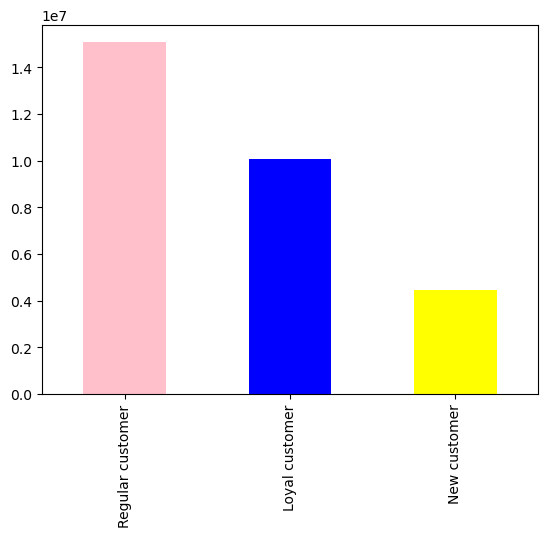

In [23]:
# a bar chart of value counts for customer Loyalty
cus_bar=df['loyalty_flag'].value_counts().plot.bar(color=['pink','blue','yellow'])

It's mean the most number of orders come from regular customers, and followed by loyal customers.

In [24]:
# export the bar chart
cus_bar.figure.savefig(os.path.join(path,'04.Analysis','cus_bar.png'))

# step5 

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
# 1.make a small data frame with just the columns needed & using the "small" database we have already isolated
df_5=small[['prices','order_hour_of_day']]

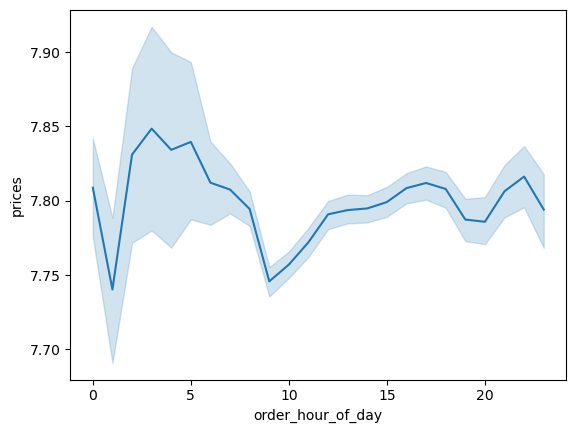

In [26]:
# next we can make a line chart using this smaller representative subset
line_hour = sns.lineplot(data=df_5,x='order_hour_of_day',y='prices')

In [28]:
# export the line graph
line_hour.figure.savefig(os.path.join(path,'04.Analysis','hour_of_day_line.png'))

# step6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [30]:
# make a smaller df with the columns we need
df_6=small[['Age','dependants']]

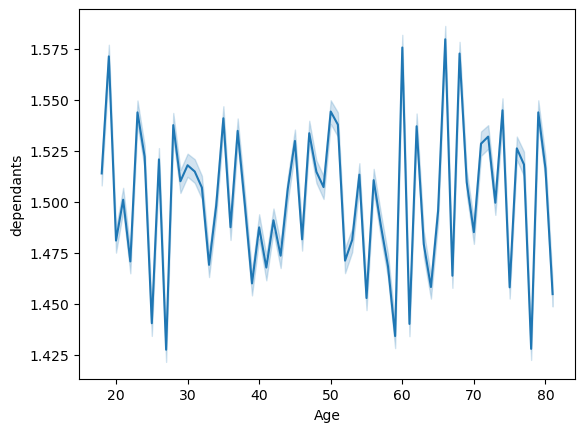

In [31]:
# make a line chart 
line_age=sns.lineplot(data=df_6,x='Age',y='dependants')

In [32]:
# export the line plot
line_age.figure.savefig(os.path.join(path,'04.Analysis','age_line.png'))

# step7

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

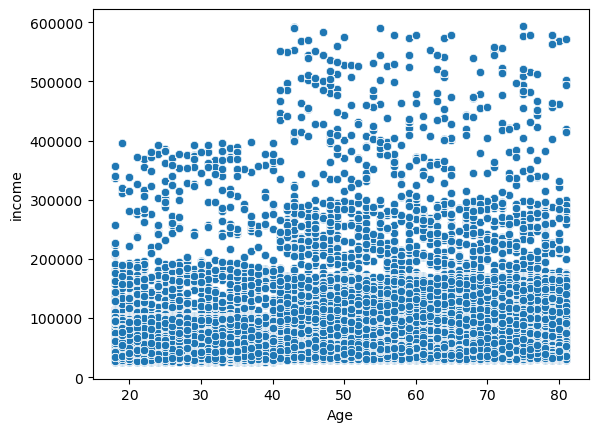

In [34]:
# create a scatterplot of age and income
scatter_income=sns.scatterplot(data=df,x='Age',y='income')

This scatterplot shows that there is a pretty wide dispersion of incomes，but most people are under 200,000

In [35]:
#export the scatterplot
scatter_income.figure.savefig(os.path.join(path,'04.Analysis','income_scatter.png'))